# Random Forest hyperparameters tuning using Grid & Random Search
### By- Aarush Kumar
### Dated: November 17,2021

In [1]:
#import libraries for pre-processing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [2]:
housing= pd.read_csv('/home/aarush100616/Downloads/Projects/Random Forest hyper/Data/Melbourne_housing_FULL.csv')

In [3]:
housing

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

In [5]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
housing.shape

(34857, 21)

In [7]:
housing.size

731997

In [8]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
housing.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [10]:
housing.describe().T

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Lattitude      26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [12]:
#change Postcode
housing['Postcode']= housing['Postcode'].astype('object')
#lastly, change Propertycount to category
housing['Propertycount']= housing['Propertycount'].astype('object')

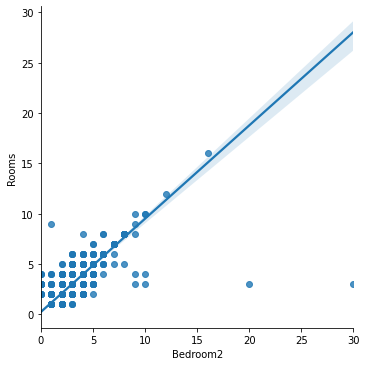

In [13]:
sns.lmplot(data= housing, x='Bedroom2', y='Rooms')

In [14]:
#drop Bedroom2
housing= housing.drop(['Bedroom2'], axis=1)

In [15]:
# check number of bathrooms
housing['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [16]:
housing.loc[housing.Bathroom>7].head()

Suburb         Address  Rooms Type      Price Method SellerG  \
2536      Burwood   36 Cumming St      3    h        NaN     PI    Ross   
8251      Preston   421 Murray Rd      4    h   760000.0     PI   Barry   
17472  Camberwell  1088 Toorak Rd      8    h  2200000.0     PI    Ross   
25717     Burwood     79 Elgar Rd     10    h  2315000.0     SP  Buxton   
26210     Mitcham  20 Harrison St     16    h  5000000.0      S  Buxton   

             Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
2536    8/10/2016      11.7     3125      12.0  0.0     946.0           NaN   
8251   22/05/2016       8.8     3072       8.0  7.0    1254.0         280.0   
17472   8/07/2017       7.7     3124       8.0  4.0     650.0           NaN   
25717  28/10/2017      10.4     3125       9.0  2.0     612.0         466.0   
26210  28/10/2017      17.2     3132       8.0  8.0       NaN           NaN   

       YearBuilt              CouncilArea  Lattitude  Longtitude  \
2536      1950.0      Monash City Council  -37.85300   145.11290   
8251      1928.0     Darebin City Council  -37.73670   144.98950   
17472        NaN  Boroondara City Council  -37.84812   145.07414   
25717     2015.0      Monash City Council  -37.84461   145.10968   
26210        NaN  Whitehorse City Council  -37.81405   145.19891   

                  Regionname Propertycount  
2536   Southern Metropolitan          5678  
8251   Northern Metropolitan         14577  
17472  Southern Metropolitan          8920  
25717  Southern Metropolitan          5678  
26210   Eastern Metropolitan          6871

In [17]:
#check building area 
housing.loc[housing.BuildingArea<1].head()

Suburb        Address  Rooms Type      Price Method  \
7211      North Melbourne   19 Shands La      2    t   841000.0      S   
16540     South Melbourne  148 Cobden St      3    h        NaN      S   
19775        Balwyn North  14 Wanbrow Av      5    h  1950000.0      S   
19840            Bundoora  22 Moreton Cr      3    h   814000.0      S   
20038  Heidelberg Heights    8 Thames St      3    h        NaN     SN   

        SellerG        Date  Distance Postcode  Bathroom  Car  Landsize  \
7211     Jellis   4/03/2017       2.3     3051       1.0  1.0     215.0   
16540  Marshall  24/06/2017       1.9     3205       2.0  0.0     282.0   
19775        RT   3/09/2017       9.7     3104       3.0  2.0     743.0   
19840     Barry   3/09/2017      12.1     3083       1.0  2.0     542.0   
20038     Miles   3/09/2017       8.8     3081       1.0  2.0     658.0   

       BuildingArea  YearBuilt                CouncilArea  Lattitude  \
7211           0.00     2000.0     Melbourne City Council  -37.79530   
16540          0.01     1920.0  Port Phillip City Council  -37.83658   
19775          0.00     1949.0    Boroondara City Council  -37.80235   
19840          0.00     1970.0       Banyule City Council  -37.70861   
20038          0.00     1920.0       Banyule City Council  -37.75287   

       Longtitude             Regionname Propertycount  
7211    144.94370  Northern Metropolitan          6821  
16540   144.96292  Southern Metropolitan          5943  
19775   145.09311  Southern Metropolitan          7809  
19840   145.05691  Northern Metropolitan         10175  
20038   145.05547   Eastern Metropolitan          2947

In [18]:
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

77

In [19]:
#use the unary operator ~ to delete the rows
housing = housing[~(housing['BuildingArea'] < 1)]  
#check the deletion
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

0

In [20]:
housing = housing.reset_index()

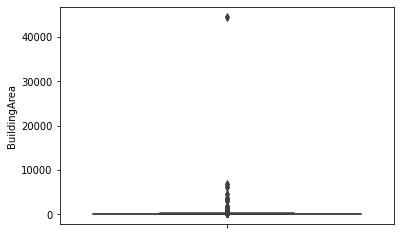

In [21]:
sns.boxplot(data = housing, y = 'BuildingArea')

In [22]:
housing.loc[housing.BuildingArea>40000]

index        Suburb         Address  Rooms Type      Price Method  \
22614  22632  New Gisborne  71 Hamilton Rd      5    h  1355000.0      S   

      SellerG        Date  Distance  ... Bathroom  Car  Landsize  \
22614   Raine  23/09/2017      48.1  ...      3.0  5.0   44500.0   

       BuildingArea  YearBuilt                   CouncilArea Lattitude  \
22614       44515.0        NaN  Macedon Ranges Shire Council -37.45392   

       Longtitude         Regionname Propertycount  
22614   144.58864  Northern Victoria           849  

[1 rows x 21 columns]

In [24]:
#replace outlier building area
housing['BuildingArea'].replace(44515.0, 445, inplace=True)

In [25]:
# check YearBuilt > 2018
print(housing['YearBuilt'].loc[housing.YearBuilt>2018])
#replace 2106 with 2016 and 2019 with 2018
housing['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

2453     2106.0
32960    2019.0
Name: YearBuilt, dtype: float64


In [26]:
# check missing data
housing.isnull().sum()

index                0
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19304
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [27]:
#first with the mean
priceWithMean = housing['Price'].fillna(housing['Price'].mean())
BAWithMean = housing['BuildingArea'].fillna(housing['BuildingArea'].mean())

#now with the median
priceMedian = housing['Price'].fillna(housing['Price'].median())
BAMedian = housing['BuildingArea'].fillna(housing['BuildingArea'].median())

In [28]:
missVIDsJoint = housing['Price'].isnull() | housing['BuildingArea'].isnull()

In [29]:
# create a dictionary to indicate different colors, missing values will be orange
colorChoiceDict = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}# create a column with color values using list comprehension
colorCol = [colorChoiceDict[val] for val in missVIDsJoint]

Text(0, 0.5, 'Price')

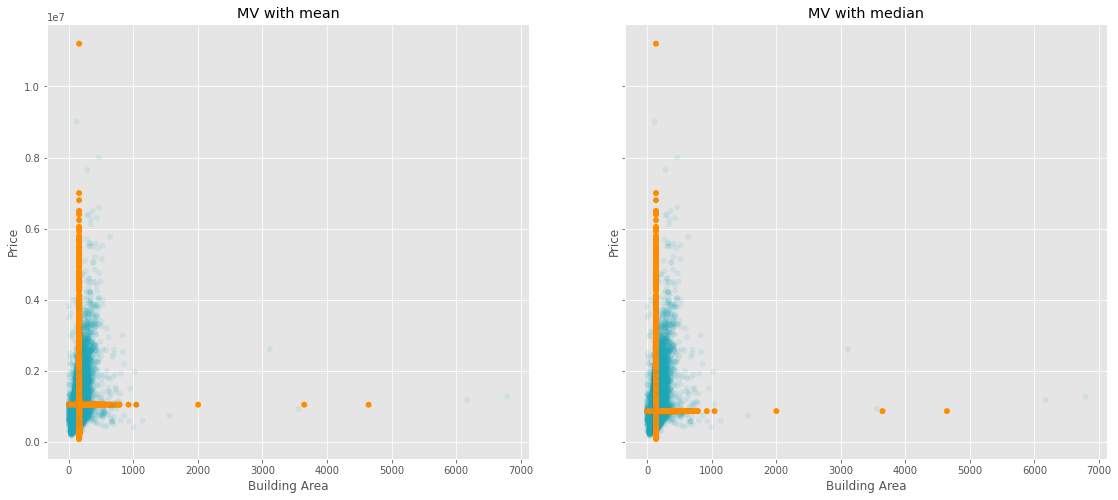

In [30]:
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19, 8))
ax1.scatter(BAWithMean, priceWithMean, c = colorCol, linewidth=0)
ax1.set_title('MV with mean')
ax1.set_xlabel('Building Area')
ax1.set_ylabel('Price')
ax2.scatter(BAMedian, priceMedian, c = colorCol, linewidth=0)
ax2.set_title('MV with median')
ax2.set_xlabel('Building Area')
ax2.set_ylabel('Price')

In [31]:
housing['Price']= housing['Price'].fillna(housing['Price'].median())
housing['Landsize']= housing['Landsize'].fillna(housing['Landsize'].median())
#Similarly, fill the only missing value of  all the other numeric values
housing['Distance'] = housing['Distance'].fillna(housing['Distance'].median())
housing['BuildingArea']= housing['BuildingArea'].fillna(housing['BuildingArea'].median())
housing['Lattitude']= housing['Lattitude'].fillna(housing['Lattitude'].median())
housing['Longtitude']= housing['Longtitude'].fillna(housing['Longtitude'].median())
housing['YearBuilt']= housing['YearBuilt'].fillna(housing['YearBuilt'].median())
housing.isnull().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bathroom         8226
Car              8726
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [32]:
housing['Bathroom']= housing['Bathroom'].fillna(housing['Bathroom'].mode()[0])
housing['Car']= housing['Car'].fillna(housing['Car'].mode()[0])
housing['CouncilArea']= housing['CouncilArea'].fillna(housing['CouncilArea'].mode()[0])
housing['Regionname']= housing['Regionname'].fillna(housing['Regionname'].mode()[0])
housing['Propertycount']= housing['Propertycount'].fillna(housing['Propertycount'].mode()[0])
housing['Postcode']= housing['Postcode'].fillna(housing['Postcode'].mode()[0])
housing.isnull().sum()

index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [33]:
housing['Bathroom'] = pd.to_numeric(housing['Bathroom']).round(0).astype(int)
housing['Car'] = pd.to_numeric(housing['Car']).round(0).astype(int)

In [34]:
# create additional columns filled with 0 values
housing["isOutlierPrice"] = 0 
housing["isOutlierDistance"] = 0

# save the mean and standard deviation in variables
meanPrice = housing['Price'].mean()
stdDevPrice = housing['Price'].std()

meanDistance = housing['Distance'].mean()
stdDevDistance = housing['Distance'].std()

#mark outliers as 
housing['isOutlierPrice'] = np.where(abs(housing['Price'] - meanPrice) > 5 * stdDevPrice, 1, 0)
housing['isOutlierDistance'] = np.where(abs(housing['Distance'] - meanDistance) > 5 * stdDevDistance, 1, 0)

In [35]:
#create a function to compute the percentage of missing values
def percent(nom, denom):
    res= (nom*100)/denom
    print("%.3f%%" % round(res,3))

#percentage of MV for Price
percent(housing["isOutlierPrice"].value_counts()[1], housing["isOutlierPrice"].value_counts()[0])

0.465%


In [36]:
#percentage of MV for Landsize
percent(housing["isOutlierDistance"].value_counts()[1], housing["isOutlierDistance"].value_counts()[0])

0.196%


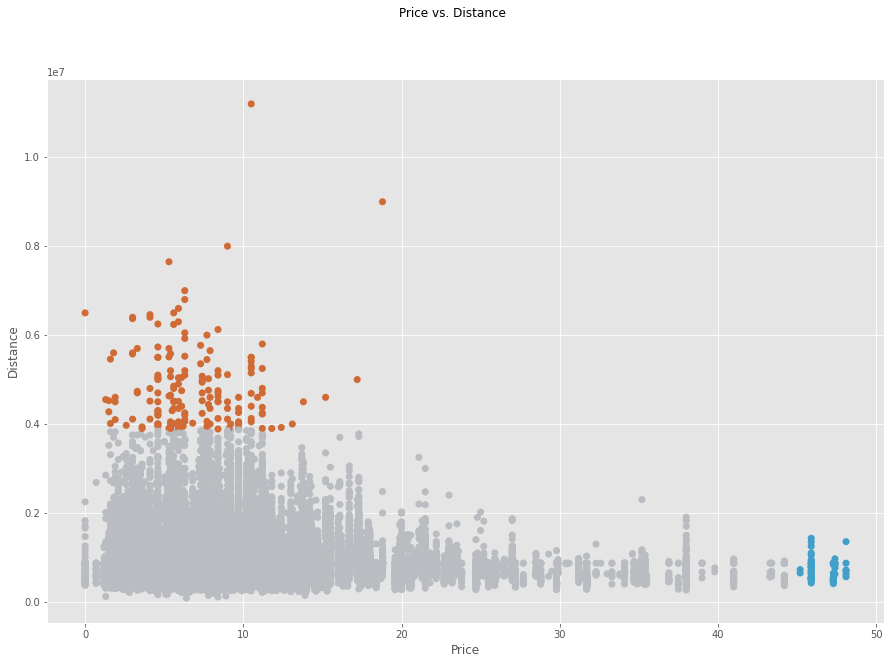

In [37]:
# first create an empty list
colorColumn = []
# we make use of the HEX color codes to use nicely distinguisable colors
for i in range(len(housing)):
    if housing["isOutlierPrice"][i]== 1:
        colorColumn.append("#D06B36") # orange color
    elif housing["isOutlierDistance"][i] == 1:
        colorColumn.append("#40A0C9") # a blueish color
    else:
        colorColumn.append("#B9BCC0") # gray

plt.figure(figsize=(15,10))
plt.xlabel('Price')
plt.suptitle('Price vs. Distance')
plt.ylabel('Distance')
plt.scatter(housing.Distance, housing.Price , c = colorColumn, s = 50, linewidth=0)

In [38]:
#take just the price outlier
housing.iloc[:,:19][housing.Price > 11000000]

index    Suburb    Address  Rooms Type       Price Method  \
25585  25635  Brighton  6 Cole St      4    h  11200000.0     VB   

             SellerG        Date  Distance  Postcode  Bathroom  Car  Landsize  \
25585  hockingstuart  28/10/2017      10.5    3186.0         3    2    1400.0   

       BuildingArea  YearBuilt           CouncilArea  Lattitude  Longtitude  
25585         136.0     1970.0  Bayside City Council  -37.89335   144.98643

In [47]:
housing.dropna()

index      Suburb             Address  Rooms Type      Price Method  \
0          0  Abbotsford       68 Studley St      2    h   870000.0     SS   
1          1  Abbotsford        85 Turner St      2    h  1480000.0      S   
2          2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3          3  Abbotsford  18/659 Victoria St      3    u   870000.0     VB   
4          4  Abbotsford        5 Charles St      3    h  1465000.0     SP   
...      ...         ...                 ...    ...  ...        ...    ...   
34775  34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34776  34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34777  34854  Yarraville      147A Severn St      2    t   705000.0      S   
34778  34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34779  34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  ...  Landsize  BuildingArea  \
0             Jellis   3/09/2016       2.5  ...     126.0         136.0   
1             Biggin   3/12/2016       2.5  ...     202.0         136.0   
2             Biggin   4/02/2016       2.5  ...     156.0          79.0   
3             Rounds   4/02/2016       2.5  ...       0.0         136.0   
4             Biggin   4/03/2017       2.5  ...     134.0         150.0   
...              ...         ...       ...  ...       ...           ...   
34775            Jas  24/02/2018       6.3  ...     593.0         136.0   
34776        Sweeney  24/02/2018       6.3  ...      98.0         104.0   
34777            Jas  24/02/2018       6.3  ...     220.0         120.0   
34778  hockingstuart  24/02/2018       6.3  ...     520.5         136.0   
34779             RW  24/02/2018       6.3  ...     250.0         103.0   

       YearBuilt               CouncilArea  Lattitude  Longtitude  \
0         1970.0        Yarra City Council  -37.80140   144.99580   
1         1970.0        Yarra City Council  -37.79960   144.99840   
2         1900.0        Yarra City Council  -37.80790   144.99340   
3         1970.0        Yarra City Council  -37.81140   145.01160   
4         1900.0        Yarra City Council  -37.80930   144.99440   
...          ...                       ...        ...         ...   
34775     1970.0  Maribyrnong City Council  -37.81053   144.88467   
34776     2018.0  Maribyrnong City Council  -37.81551   144.88826   
34777     2000.0  Maribyrnong City Council  -37.82286   144.87856   
34778     1970.0  Maribyrnong City Council  -37.80770   145.00780   
34779     1930.0  Maribyrnong City Council  -37.81810   144.89351   

                  Regionname  Propertycount  isOutlierPrice isOutlierDistance  
0      Northern Metropolitan         4019.0               0                 0  
1      Northern Metropolitan         4019.0               0                 0  
2      Northern Metropolitan         4019.0               0                 0  
3      Northern Metropolitan         4019.0               0                 0  
4      Northern Metropolitan         4019.0               0                 0  
...                      ...            ...             ...               ...  
34775   Western Metropolitan         6543.0               0                 0  
34776   Western Metropolitan         6543.0               0                 0  
34777   Western Metropolitan         6543.0               0                 0  
34778   Western Metropolitan         6543.0               0                 0  
34779   Western Metropolitan         6543.0               0                 0  

[34780 rows x 23 columns]

In [48]:
housing['houseAge'] = 2018-housing['YearBuilt']

In [49]:
housing['data'] = pd.to_datetime(housing['Date'])

In [50]:
# calculate day of year
housing['doy'] = housing['data'].dt.dayofyear
# Create year
housing['Year'] = housing['data'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

daje = []
for i in housing['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
housing['season']= pd.Series(daje)

In [51]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.copy()

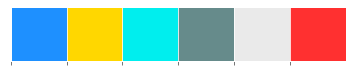

In [52]:
#create my palette
myPal = ["#1E90FF", "#FFD700", "#00EEEE", "#668B8B", "#EAEAEA", "#FF3030"]
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

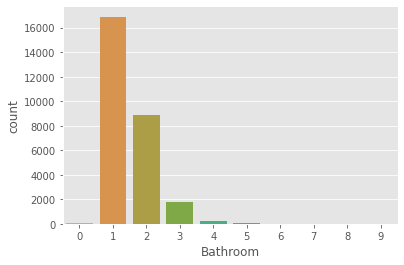

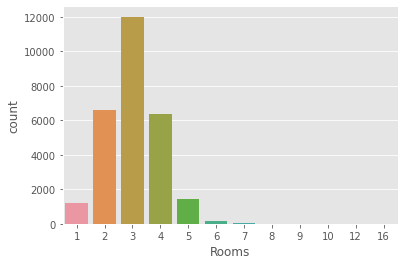

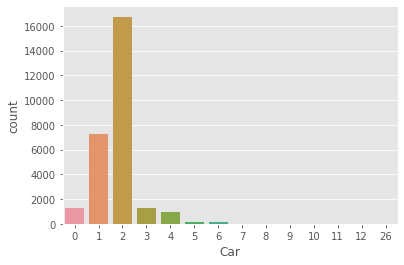

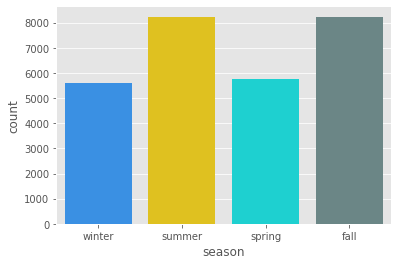

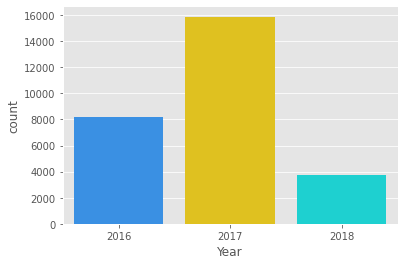

In [53]:
l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
for i in l:
    plt.figure()
    sns.countplot(x=i, data=housing)

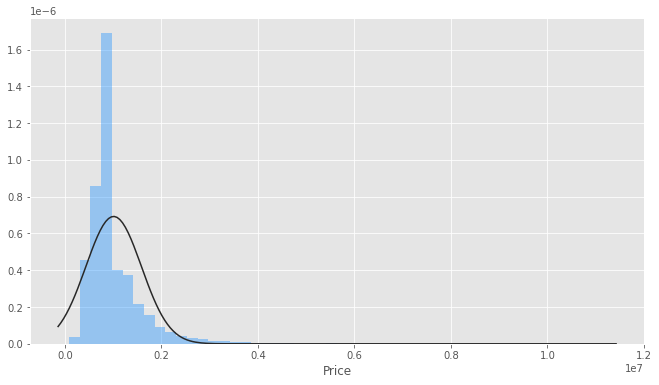

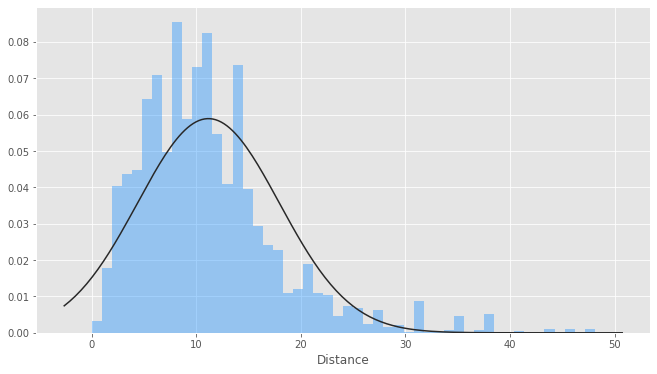

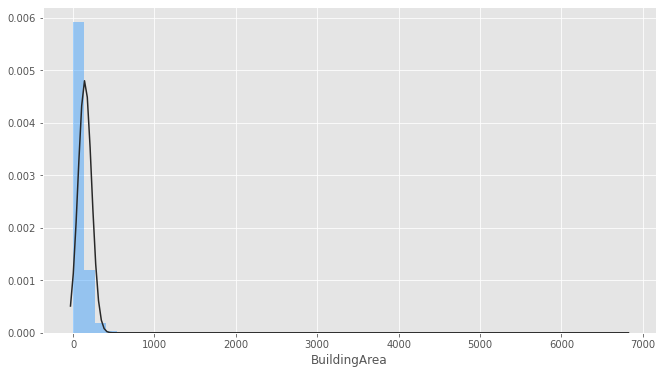

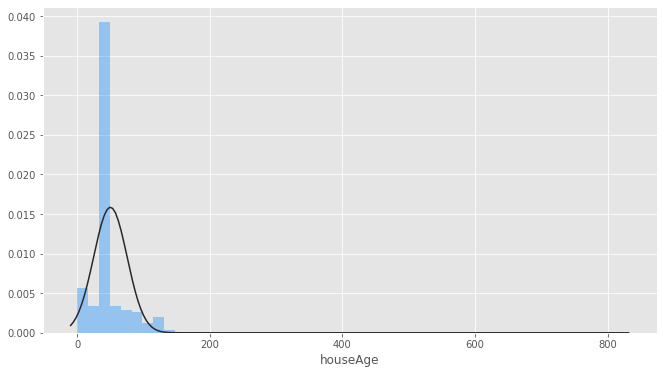

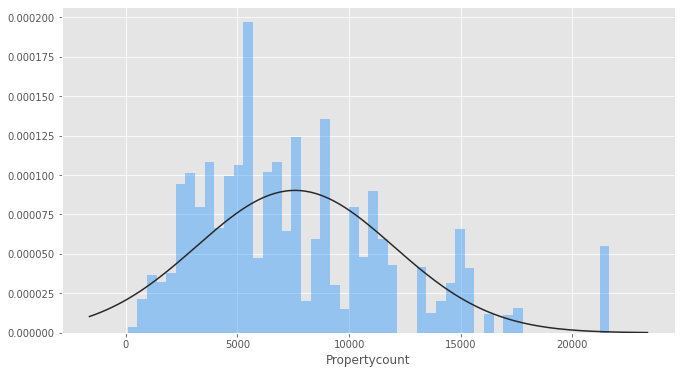

In [54]:
l= [housing['Price'], housing['Distance'], housing['BuildingArea'], housing['houseAge'], housing['Propertycount']]
for i in l:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=norm, kde=False)

(0.0, 1000.0)

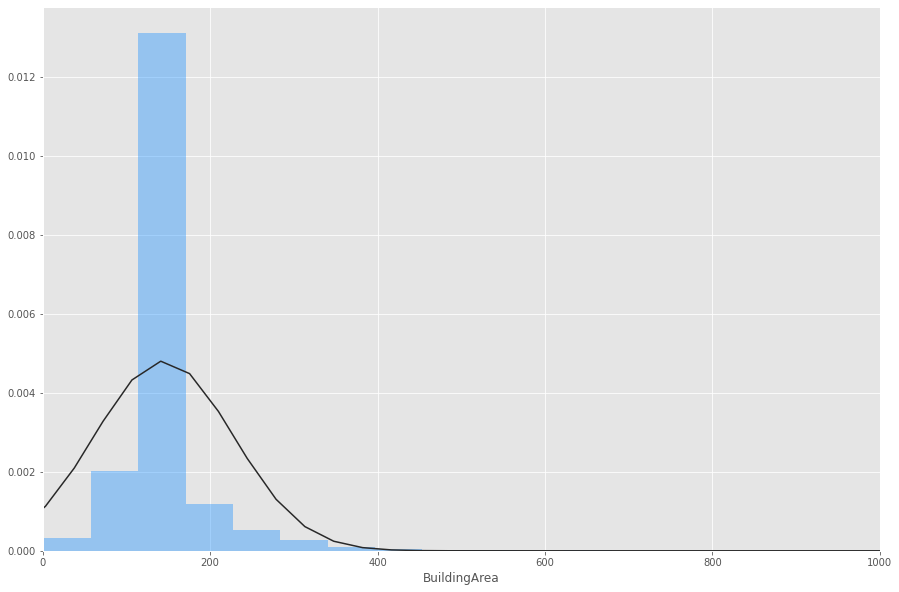

In [55]:
plt.figure(figsize=(15,10))
sns.distplot(housing['BuildingArea'], fit=norm, bins=120, kde=False)
plt.xlim(0,1000)

Text(0.5, 1.0, 'Rooms & Price')

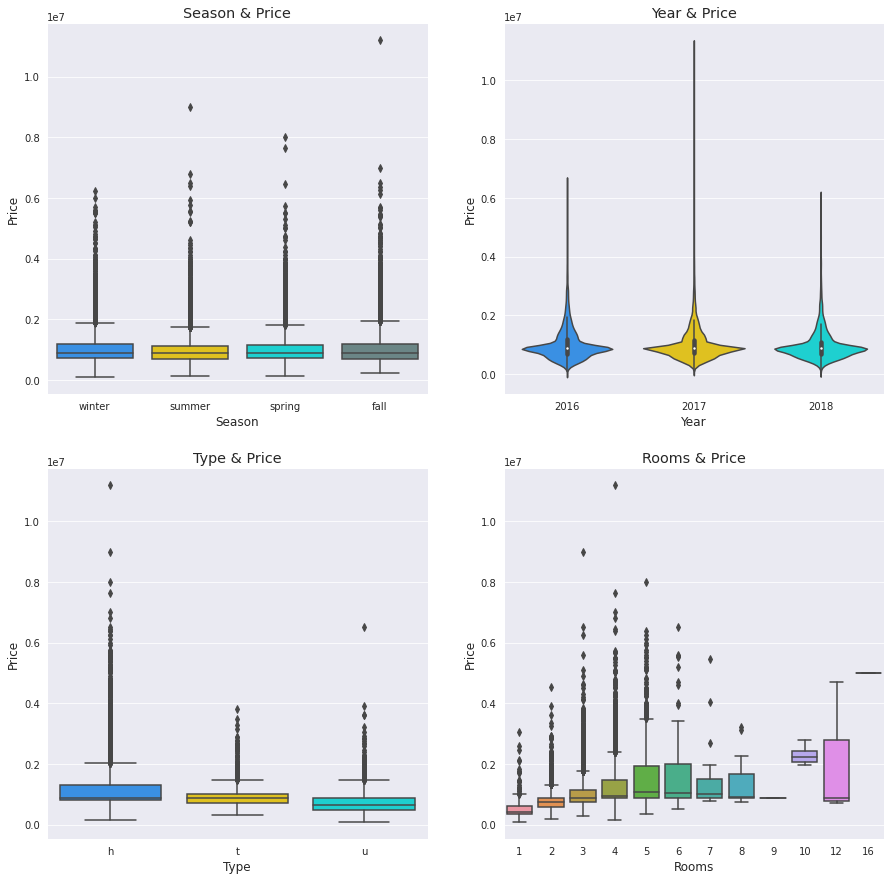

In [56]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = housing, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = housing, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = housing, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = housing, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

In [57]:
#use shape to count the number of rows of the database grouped by day using a pivot table.
housing.pivot_table('Price', index='data', aggfunc='sum').shape

(78, 1)

([<matplotlib.axis.XTick at 0x7fed54764850>,
 [Text(0, 0, ''),
  Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'August'),
  Text(0, 0, 'September'),
  Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December')])

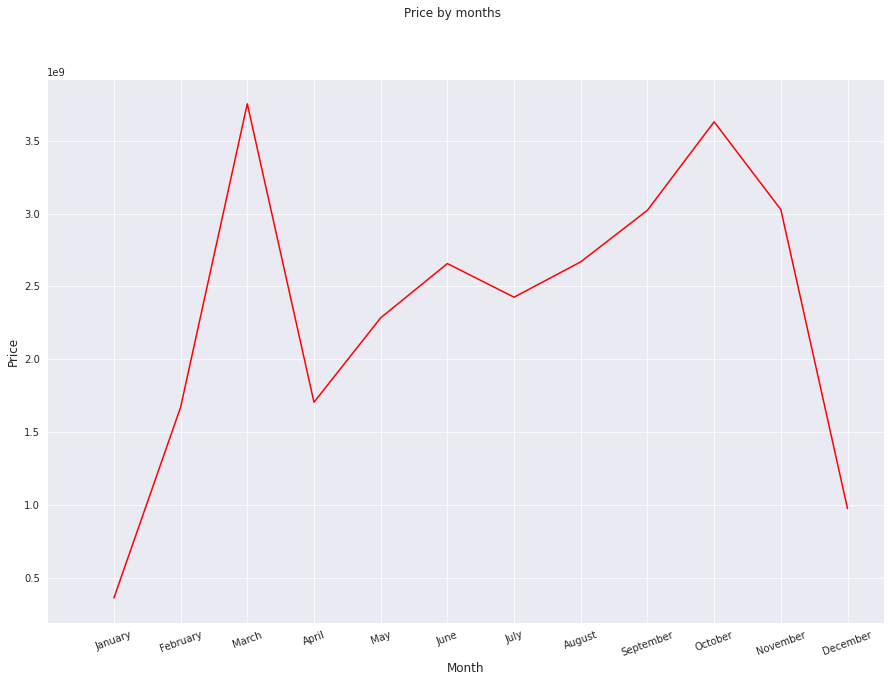

In [58]:
import calendar
# create new column storing the month of each operation
housing['month'] = housing['data'].dt.month
#use group by (alternative to pivot_table) to have the total value of houses sold per month
by_month= housing.groupby('month')['Price'].sum()
#plot figure
plt.figure(figsize=(15,10))
plt.plot(by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Price by months')
plt.ylabel('Price')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)

[Text(0, 0, '2016-01'),
 Text(0, 0, '2016-03'),
 Text(0, 0, '2016-04'),
 Text(0, 0, '2016-05'),
 Text(0, 0, '2016-06'),
 Text(0, 0, '2016-07'),
 Text(0, 0, '2016-08'),
 Text(0, 0, '2016-09'),
 Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09'),
 Text(0, 0, '2017-10'),
 Text(0, 0, '2017-11'),
 Text(0, 0, '2017-12'),
 Text(0, 0, '2018-01'),
 Text(0, 0, '2018-02'),
 Text(0, 0, '2018-03'),
 Text(0, 0, '2018-06'),
 Text(0, 0, '2018-10')]

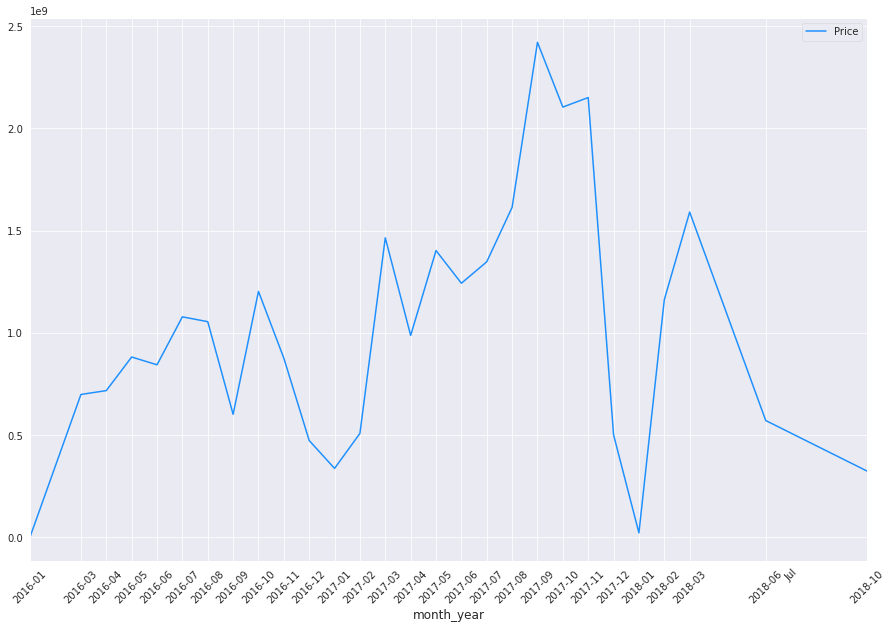

In [59]:
#create index month-year
housing['month_year'] = housing['data'].dt.to_period('M')
#use groupby to compute the price for each available month, then store the result in a dataframe
by_year_month= pd.Series.to_frame(housing.groupby('month_year')['Price'].sum())
#draw graph
fig, ax = plt.subplots(figsize=(15,10))
by_year_month.plot(ax=ax, xticks=by_year_month.index, rot=45)
ax.set_xticklabels(by_year_month.index)

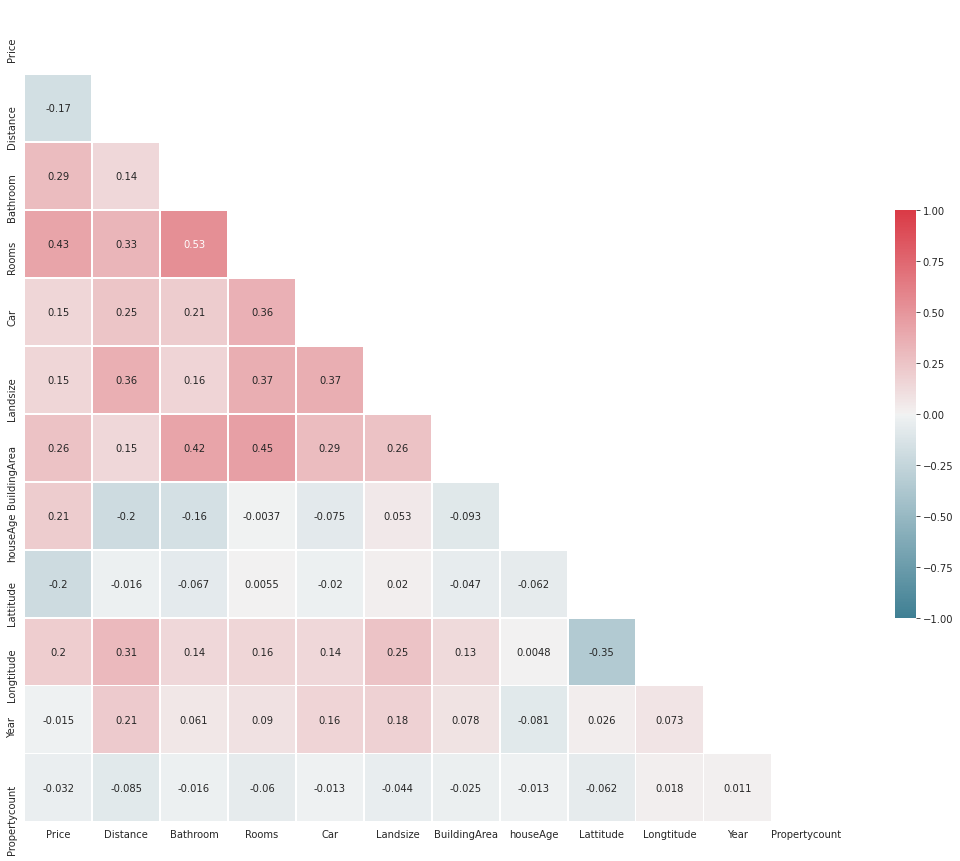

In [60]:
#select only the data we are interested in
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'houseAge', 'Lattitude', 'Longtitude', 
             'Year', 'Propertycount']
h= housing[attributes]

#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=h.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(20,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

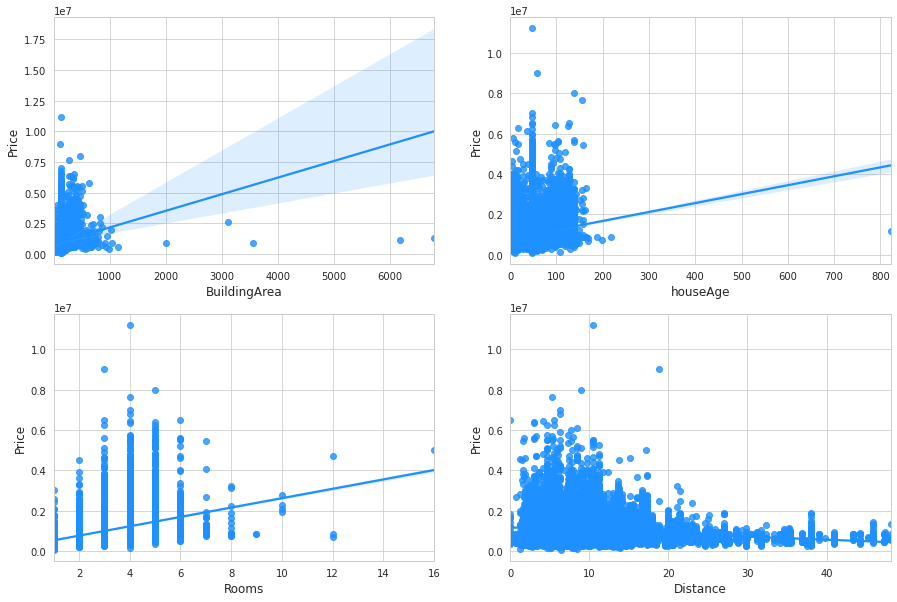

In [61]:
# Scatterplot
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= housing, x='BuildingArea', y='Price')
plt.subplot(222)
sns.regplot(data= housing, x='houseAge', y='Price')
plt.subplot(223)
sns.regplot(data= housing, x='Rooms', y='Price')
plt.subplot(224)
sns.regplot(data= housing, x='Distance', y='Price')

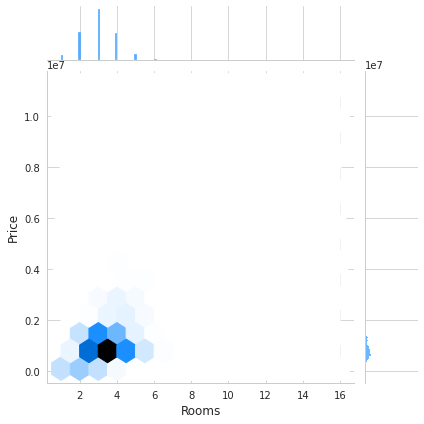

In [62]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Price and distance
    sns.jointplot(y='Price', x='Rooms', data=housing, kind='hex', gridsize=15)

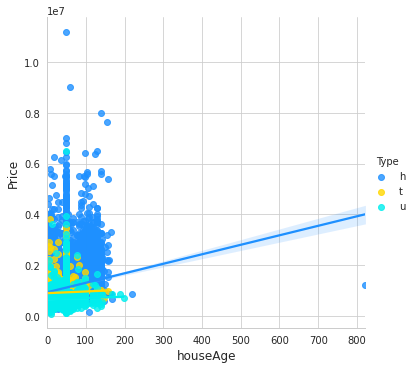

In [63]:
sns.lmplot(data= housing, x='houseAge', y= 'Price', hue= 'Type')

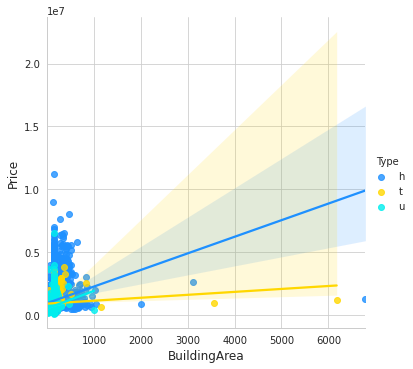

In [64]:
sns.lmplot(data= housing, x='BuildingArea', y= 'Price', hue='Type')

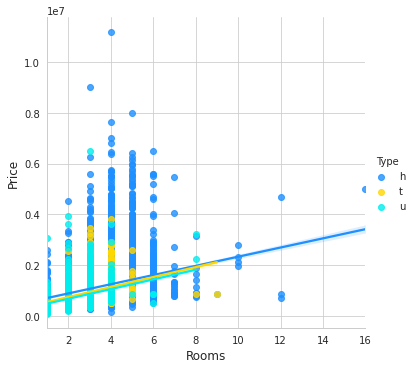

In [65]:
sns.lmplot(data= housing, x='Rooms', y= 'Price', hue='Type')

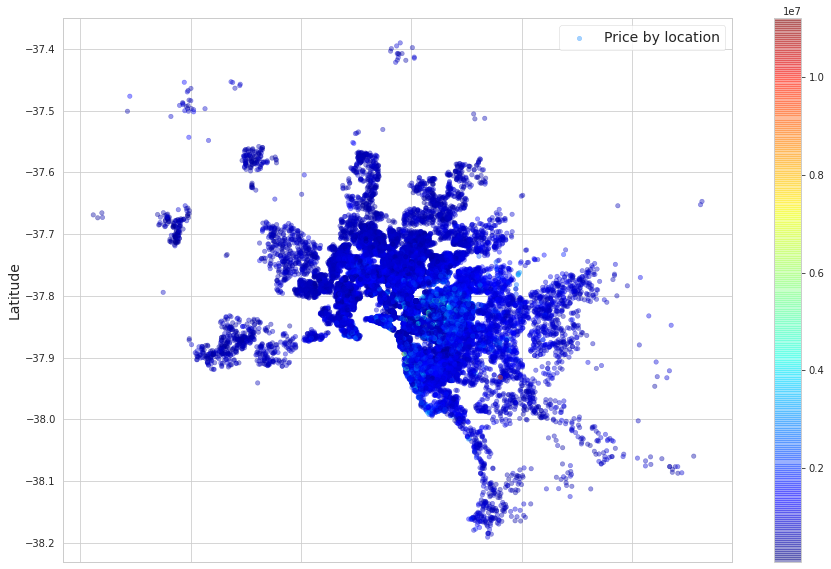

In [66]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=housing.Price, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

In [67]:
housing['Price_cut']= housing['Price'].loc[housing.Price<3500000]

Text(0.5, 1.0, 'AFTER CUT')

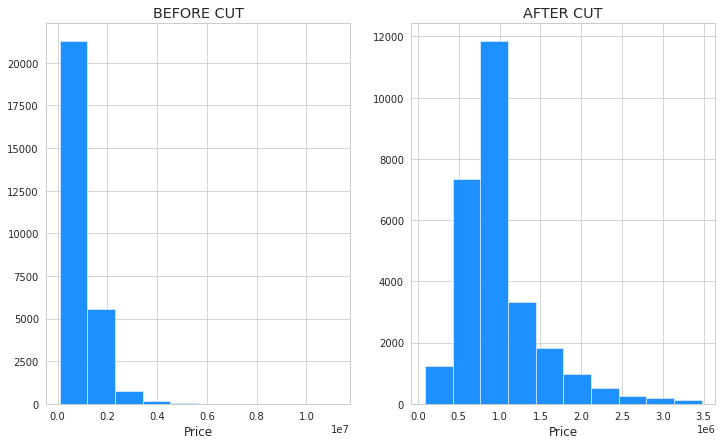

In [68]:
f, axes = plt.subplots(1,2, figsize = (12,7))
# Plot [0,0] full price
housing['Price'].hist(ax = axes[0])
axes[0].set_title('BEFORE CUT')
axes[0].set_xlabel('Price')
# Plot [0,1] price cut
housing['Price_cut'].hist(ax = axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('AFTER CUT')

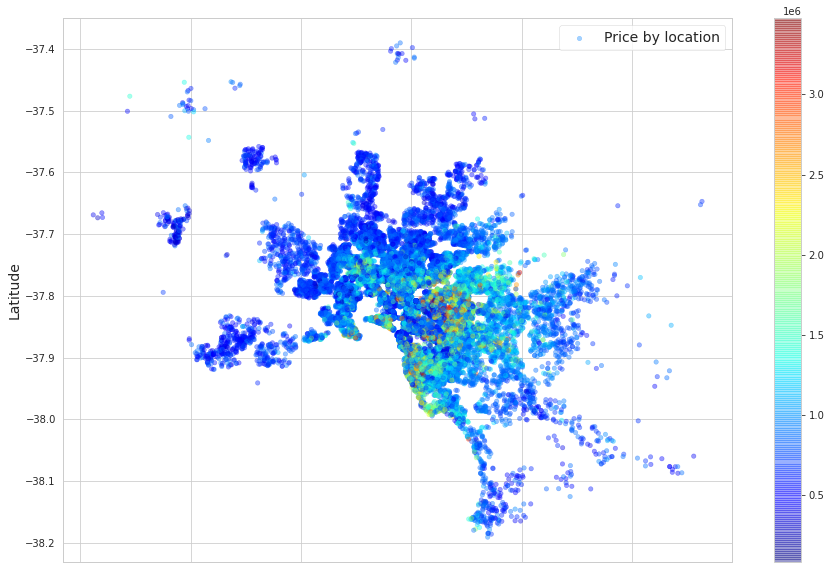

In [69]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=housing.Price_cut, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

In [70]:
#dummy variable
hD= pd.get_dummies(housing, columns= ['Type', 'Regionname', 'season'])
#drop useless variables
hD= hD.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'isOutlierPrice', 'isOutlierDistance',
            'YearBuilt', 'data', 'doy', 'month', 'month_year', 'Price_cut'], axis=1)
#check variables
hD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27824 entries, 34585 to 15795
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  27824 non-null  int64  
 1   Rooms                                  27824 non-null  int64  
 2   Price                                  27824 non-null  float64
 3   Distance                               27824 non-null  float64
 4   Bathroom                               27824 non-null  int64  
 5   Car                                    27824 non-null  int64  
 6   Landsize                               27824 non-null  float64
 7   BuildingArea                           27824 non-null  float64
 8   Lattitude                              27824 non-null  float64
 9   Longtitude                             27824 non-null  float64
 10  Propertycount                          27824 non-null  float64
 11

In [71]:
#create x and y variables
X = hD.drop("Price", axis=1)
Y = hD["Price"].copy()
#transform to array size
#feature scaling
scaler = RobustScaler()
hD= scaler.fit_transform(hD.astype(np.float64))

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [73]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [74]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 452721.13
RMSE of random forest = 157602.23
RMSE of decision tree = 0.00


In [75]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 70.94 %
Accuracy of random forest= 90.90 %
Accuracy of decision tree= 100.00 %


In [76]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [77]:
results[8]

{'fit_time': array([0.23779941, 0.24510217, 0.2462039 , 0.24034214, 0.25565767,
        0.23370671, 0.24727559, 0.24340129, 0.23273706, 0.24473548]),
 'score_time': array([0.00336409, 0.00464988, 0.00347853, 0.00332975, 0.00351739,
        0.00345778, 0.00414157, 0.00335455, 0.0032022 , 0.00336528]),
 'test_score': array([-0.01659601, -0.14910701,  0.01329909,  0.09910045, -0.02803188,
        -0.05329724, -0.04823352,  0.09601978,  0.01666432,  0.00037462]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [78]:
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [79]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

Model      RMSE_mean      RMSE_std       MAE_mean      MAE_std  \
1      Random Forest  425385.063644  2.198465e+10  248694.155219  8192.085238   
0  Linear Regression  454171.584294  2.179586e+10  286335.279085  8446.725637   
2     Decision Trees  583295.004205  2.958694e+10  321569.692388  8841.813541   

    r2_mean    r2_std  
1  0.460849  0.031059  
0  0.383877  0.018110  
2 -0.006981  0.068898

/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


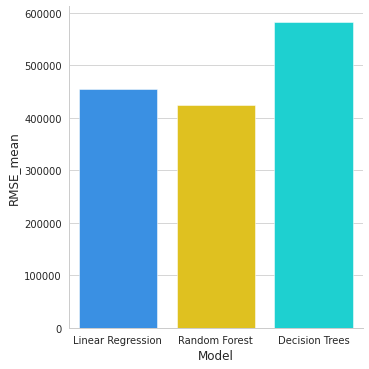

In [80]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]
grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [82]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

431301.1976406228 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
426243.6526951745 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
427749.43312311143 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
423761.30828622245 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
436762.5888860036 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
427407.3867108593 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
438136.28752514475 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
426515.89500639384 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
439042.7497126812 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
424093.04390146775 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
437021.02535113826 {'bootstrap': True, 'max_dep

In [83]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=25, n_jobs=-1)

In [84]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 77.51 %


In [85]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 358374.67


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [87]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/aarush100616/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

547098.6954424918 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
547765.9827045656 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
414705.6991339875 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
427965.67283467343 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
540267.7247722192 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
414960.07674312225 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
414506.98888890946 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
421249.9253049408 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
540868.1782170904 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
414752.9118051681 {'n_estimators': 110, 'min_samples_spl

In [89]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [90]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [91]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [92]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 86.22 %


In [93]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 234143.84


In [94]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_
#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)
#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)
#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
print(df)

    importance                                feature
0     0.113748                               Distance
1     0.097782                                  Rooms
2     0.086521                              Lattitude
3     0.083085                             Longtitude
4     0.078715                               Landsize
5     0.072032       Regionname_Southern Metropolitan
6     0.069050                                  index
7     0.064567                           BuildingArea
8     0.052936                               Bathroom
9     0.052895                          Propertycount
10    0.045259                               houseAge
11    0.043893                                 Type_h
12    0.041975                                 Type_u
13    0.024086                                    Car
14    0.011138        Regionname_Western Metropolitan
15    0.010753                                   Year
16    0.008953       Regionname_Northern Metropolitan
17    0.007991              

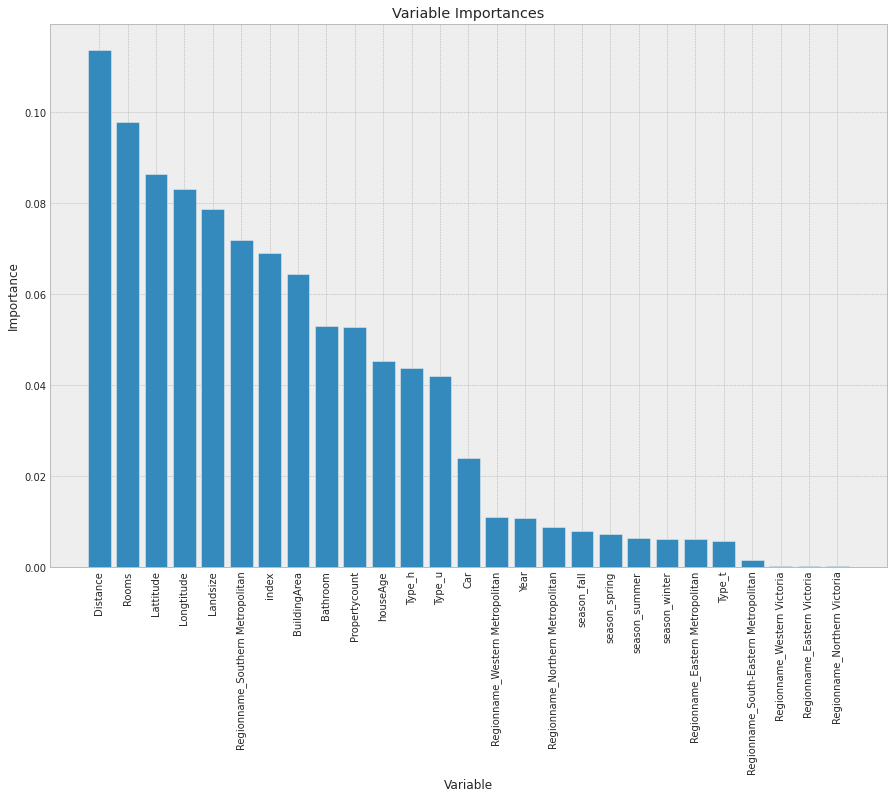

In [95]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))
# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Evaluate best model on the test set

In [96]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 407313.62


In [97]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 75.89 %


Text(0.5, 0, 'Tree depth')

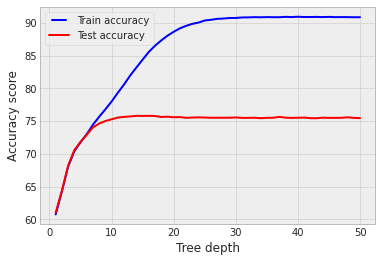

In [98]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(x_train)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(x_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')